# 01. 개요

In [1]:
import re
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#change the path to the data folderrrrr

In [2]:
os.getcwd()

'/Users/admin/Github/Beaverworks/tests'

In [6]:
os.chdir('/Users/admin/Github/Beaverworks/DATA')

In [7]:
file_list = os.listdir()
file_list

['test', 'offerTrain.xlsx', 'final_code', 'sampleTest.xlsx']

In [8]:
traindf = pd.read_excel('offerTrain.xlsx')
testdf = pd.read_excel('sampleTest.xlsx')
traindf = traindf.rename(columns={"상점명": "store_name", "카테고리명": "food_type","가격":"price", "상품명":"MENU_NM", "표준상품명":"MENU_STD_NM", "사업자등록번호":"biz_num"})
testdf = testdf.rename(columns={"상점명": "store_name", "카테고리명": "food_type","가격":"price", "상품명":"MENU_NM", "표준상품명":"MENU_STD_NM", "사업자등록번호":"biz_num"})

print(traindf.head())
print(testdf.head())

      biz_num     store_name food_type MENU_NM MENU_STD_NM  price
0  1464300910     BGT단팥빵_불광점      전체메뉴   -3000           -  -3000
1  1464300910     BGT단팥빵_불광점      전체메뉴   -2000           -  -2000
2  2200284777  미각상점 강남역지하상가점   마카롱/뚱카롱       0           -      0
3  2200284777  미각상점 강남역지하상가점   마카롱/뚱카롱       0           -      0
4  2200284777  미각상점 강남역지하상가점   마카롱/뚱카롱       0           -      0
      biz_num   store_name         food_type MENU_NM MENU_STD_NM  price
0  1464300910   BGT단팥빵_불광점              전체메뉴   -1500           -  -1500
1  4815300544  HY스터디카페_2호점               시간권       1           -   1000
2  1572500857     에그드랍_당진점             *기프티콘       1           -      1
3  4991401716           더멜              진동벨        3           -      0
4  6318602785         배드라핀  DISTILLED LIQUOR       4           -   3000


In [9]:
traindf.to_csv('traindf.csv', index=False)
testdf.to_csv('testdf.csv', index=False)
traindf = pd.read_csv('traindf.csv')
testdf = pd.read_csv('testdf.csv')


In [10]:
traindf.columns

Index(['biz_num', 'store_name', 'food_type', 'MENU_NM', 'MENU_STD_NM',
       'price'],
      dtype='object')

In [11]:
# label(MENU_STD_NM) list
train_label = traindf['MENU_STD_NM']
test_label = testdf['MENU_STD_NM']

# label(MENU_STD) 중복 제거 리스트
train_label_set = set(train_label)
test_label_set = set(test_label)

# menu(MENU_NM) list
train_menu = traindf['MENU_NM']
test_menu = testdf['MENU_NM']

# menu(MENU_NM) 중복 제거 리스트
train_menu_set = set(train_menu)
test_menu_set = set(test_menu)

# type(food_type) list
train_type = traindf['food_type']
test_type = testdf['food_type']

# type(food_type) 중복 제거 리스트
train_type_set = set(train_type)
test_type_set = set(test_type)



In [12]:
# dict 형태 (상위 150)
label_dict = dict(Counter(train_label).most_common(150))
menu_dict = dict(Counter(train_menu).most_common(150))
type_dict = dict(Counter(train_type).most_common(150))

# dict 형태 (전체)
label_dict_all = dict(Counter(train_label).most_common())
menu_dict_all = dict(Counter(train_menu).most_common())
type_dict_all = dict(Counter(train_type).most_common())



In [13]:
from collections import OrderedDict

d = OrderedDict(reversed(label_dict_all.items()))

d


OrderedDict([('ZEAL 양귀', 1),
             ('ZEAL 쇠고기져키', 1),
             ('ZEAL 사슴힘줄', 1),
             ('ZEAL 사료 양고기 리조또', 1),
             ('TWG 프렌치 얼그레이티', 1),
             ('TWG 프렌치 얼그레이', 1),
             ('TWG 크림 카라멜', 1),
             ('TWG 잉글리쉬 블랙퍼스트', 1),
             ('TWG 이터널썸머', 1),
             ('TWG 그랜드웨딩티', 1),
             ('SPC삼립 휘낭시에', 1),
             ('SPC삼립 허쉬 쵸코 휘낭시에', 1),
             ('SPC삼립 피자맛 바게트', 1),
             ('SPC삼립 포켓몬', 1),
             ('SPC삼립 통밀 식빵', 1),
             ('SPC삼립 젤리뽀', 1),
             ('SPC삼립 완두', 1),
             ('SPC삼립 쌀오란다', 1),
             ('SPC삼립 소보루', 1),
             ('SPC삼립 베이커리', 1),
             ('SPC삼립 버터 크림', 1),
             ('SPC삼립 버터 롤', 1),
             ('SPC삼립 밀크 샌드', 1),
             ('SPC삼립 마늘 바게트', 1),
             ('SPC삼립 단팥 크림', 1),
             ('SPC삼립 단팥', 1),
             ('SPC삼립 누네띠네 미니', 1),
             ('SPC삼립 누네띠네', 1),
             ('SPC삼립 꿀 호떡', 1),
             ('SPC삼립 꿀 약과', 1),
             ('SPC삼립

In [14]:
len(set(label_dict_all.keys()))

22802

In [11]:
# label의 개수의 set -> 446개 
label_set_count = len(set(label_dict_all.values()))
label_set_count

446

In [12]:
import matplotlib.pyplot as plt

In [13]:
import collections
histogram = collections.Counter(label_dict_all.values())
print(histogram)

Counter({1: 11300, 2: 3436, 3: 1596, 4: 958, 5: 702, 6: 542, 7: 417, 8: 292, 9: 218, 10: 208, 11: 186, 12: 153, 14: 139, 15: 117, 16: 111, 13: 109, 17: 91, 21: 71, 18: 70, 19: 66, 23: 56, 20: 55, 25: 53, 24: 47, 22: 47, 27: 45, 26: 44, 39: 39, 29: 39, 34: 38, 32: 38, 36: 35, 37: 34, 33: 34, 30: 32, 40: 31, 28: 31, 38: 30, 31: 29, 44: 27, 41: 27, 42: 26, 45: 22, 35: 22, 47: 20, 43: 20, 58: 18, 53: 16, 48: 16, 62: 14, 61: 14, 56: 14, 55: 14, 52: 14, 49: 14, 81: 13, 72: 13, 59: 13, 57: 13, 78: 12, 75: 12, 68: 12, 64: 12, 63: 12, 51: 12, 50: 12, 46: 12, 91: 11, 76: 11, 54: 11, 83: 10, 77: 10, 73: 10, 69: 10, 66: 10, 65: 10, 114: 9, 85: 9, 96: 8, 93: 8, 84: 8, 79: 8, 67: 8, 98: 7, 70: 7, 60: 7, 122: 6, 111: 6, 108: 6, 107: 6, 101: 6, 97: 6, 94: 6, 86: 6, 80: 6, 71: 6, 292: 5, 247: 5, 241: 5, 139: 5, 136: 5, 118: 5, 113: 5, 106: 5, 103: 5, 100: 5, 95: 5, 90: 5, 87: 5, 82: 5, 342: 4, 255: 4, 248: 4, 246: 4, 234: 4, 221: 4, 189: 4, 182: 4, 125: 4, 123: 4, 117: 4, 116: 4, 88: 4, 74: 4, 287: 3, 

In [14]:
total_count = sum(histogram.values())
for key in histogram:
    histogram[key] = histogram[key]/total_count
print(histogram)

Counter({1: 0.4955705639856153, 2: 0.15068853609332514, 3: 0.06999386018770283, 4: 0.04201385843347075, 5: 0.03078677309007982, 6: 0.023769844750460487, 7: 0.018287869485132884, 8: 0.01280589421980528, 9: 0.00956056486273134, 10: 0.009122006841505131, 11: 0.008157179194807473, 12: 0.006709937724760986, 14: 0.006095956495044294, 15: 0.005131128848346636, 16: 0.004867994035610911, 13: 0.00478028243136567, 17: 0.003990877993158495, 21: 0.0031137619507060786, 18: 0.0030699061485834575, 19: 0.0028944829400929743, 23: 0.002455924918866766, 20: 0.0024120691167441454, 25: 0.0023243575124989035, 24: 0.0020612226997631785, 22: 0.0020612226997631785, 27: 0.001973511095517937, 26: 0.0019296552933953162, 39: 0.0017103762827822121, 29: 0.0017103762827822121, 34: 0.0016665204806595912, 32: 0.0016665204806595912, 36: 0.0015349530742917287, 37: 0.001491097272169108, 33: 0.001491097272169108, 30: 0.0014033856679238662, 40: 0.0013595298658012455, 28: 0.0013595298658012455, 38: 0.0013156740636786246, 31: 

In [124]:
0.21094640820980626+0.03078677309007982

0.24173318129988608

In [125]:
aa = {1: 0.4955705639856153, 2: 0.15068853609332514, 3: 0.06999386018770283, 4: 0.04201385843347075, '5~':0.24173318129988608}
sum(aa.values())

1.0

In [115]:
1- 0.7890535917901937

0.21094640820980626

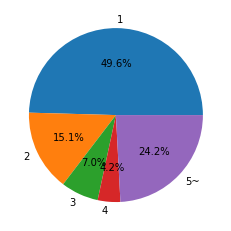

In [126]:
labels = ['' if x == 'class_name' else x for x in aa.keys()]
plt.pie(aa.values(), labels=labels, autopct='%1.1f%%')
plt.show()

In [112]:
colors = [ '#00ff00', '#ff0000', '#0000ff', '#ffff00']

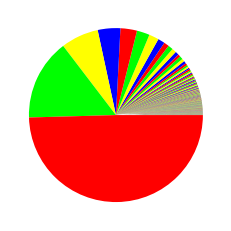

In [113]:
plt.pie(histogram.values(),colors=colors)
plt.show()

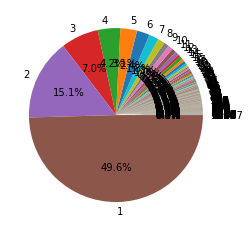

In [99]:
labels = ['' if x == 'class_name' else x for x in histogram.keys()]
plt.pie(histogram.values(), labels=labels, autopct='%1.1f%%')
plt.show()

In [39]:
total_count = sum(label_dict_all.values())
for key in label_dict_all:
    label_dict_all[key] = label_dict_all[key]/total_count
print(label_dict_all)

{'-': 0.16855657236966415, '아메리카노': 0.018246668268479357, '카페라떼': 0.012666761531301831, '바닐라 라떼': 0.008057273357111698, '레몬 에이드': 0.005841173273366443, '초코 라떼': 0.005719870952993018, '라떼': 0.005565910315595979, '딸기 라떼': 0.00554025020936314, '자몽 에이드': 0.005071370086381249, '카푸치노': 0.00466314112358607, '달걀 샐러드': 0.004572164383306002, '샌드위치': 0.00435755258572225, '말차 라떼': 0.0042619103715816654, '캐러멜 마키아토': 0.004210590159115986, '오렌지 주스': 0.0038653450934377775, '콜라': 0.0036344041373422196, '치킨 샌드위치': 0.003552758344783184, '녹차 라떼': 0.0035504256078529254, '사이다': 0.003503770869247762, '카페모카': 0.0033334810733389162, '에스프레소': 0.003083878221801293, '핫도그': 0.0030652163263592274, '갈릭 베이컨 치즈': 0.003025559798544839, '베이컨 딥치즈번': 0.0030208943246843225, '생수': 0.0030022324292422573, '햄 치즈 프렌치토스트': 0.002957910427567352, '치킨 샐러드': 0.0029322503213345123, '치즈 케이크': 0.0028925937935201235, '청포도 에이드': 0.002890261056589865, '오렌지 에이드': 0.0028506045287754766, '자몽 주스': 0.0028412735810544438, '복숭아 아이스티': 0.00277595

In [40]:
len_list = list(label_dict_all.keys())

longest_string = max(len_list, key=len)
shortest_string = min(len_list, key=len)
print(longest_string, len(longest_string))
print(shortest_string)

모나미 153 ID Ball point pen_M 27
-


In [41]:
len_list

['-',
 '아메리카노',
 '카페라떼',
 '바닐라 라떼',
 '레몬 에이드',
 '초코 라떼',
 '라떼',
 '딸기 라떼',
 '자몽 에이드',
 '카푸치노',
 '달걀 샐러드',
 '샌드위치',
 '말차 라떼',
 '캐러멜 마키아토',
 '오렌지 주스',
 '콜라',
 '치킨 샌드위치',
 '녹차 라떼',
 '사이다',
 '카페모카',
 '에스프레소',
 '핫도그',
 '갈릭 베이컨 치즈',
 '베이컨 딥치즈번',
 '생수',
 '햄 치즈 프렌치토스트',
 '치킨 샐러드',
 '치즈 케이크',
 '청포도 에이드',
 '오렌지 에이드',
 '자몽 주스',
 '복숭아 아이스티',
 '우유',
 '샐러드',
 '닥터페퍼',
 '오레오 초코 라떼',
 '밀크티',
 '아보카도 샐러드',
 '햄 치즈 토스트',
 '헤이즐넛 라떼',
 '스프라이트',
 '딸기 요거트',
 '콜드브루',
 '딸기 바나나 주스',
 '밀크 초콜릿',
 '원두',
 '블루베리 요거트',
 '코카콜라',
 '아보카도 달걀 샐러드',
 '커피',
 '(생)딸기 라떼',
 '토피넛 라떼',
 '치즈 불고기 토스트',
 '아보카도 베이컨 토스트',
 '망고 요거트',
 '망고 라떼',
 '바나나 요거트',
 '명란 아보카도번',
 '치즈볼',
 '망고 주스',
 '망고 키위',
 ' 주스',
 '딸기잼',
 '알수없음',
 '해시 브라운',
 '돌체 라떼',
 '딸기 바나나 요거트',
 '제로 콜라',
 '코코넛 커피 스무디',
 '오렌지 말차',
 '고구마 라떼',
 '귤차',
 '귤 자몽차',
 '치킨 달걀 샐러드',
 '유자차',
 '귤 라떼',
 '마카롱',
 '오렌지 밀크',
 '귤 카페라떼',
 '오렌지 카페라떼',
 '환타',
 '쿠키',
 '콘 치즈 해시브라운',
 '치즈스틱',
 '흑당 라떼',
 '요거트',
 '츄로스',
 '수박',
 '초코 케이크',
 '요거트 스무디',
 '제로 코카콜라',
 '딸기 우유',
 '떡볶이',
 '샤케라토',
 '딸기 요거트 스무디',
 

In [42]:
plt.pie(label_dict_all.values(), labels=label_dict_all.keys(), autopct='%1.1f%%')
plt.title("Key Distribution")
plt.xlabel("Count label")
plt.ylabel("Count label proportion")
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54168 missing from current font.
  font.set_

KeyboardInterrupt: ignored

In [ ]:
# Define the proportion of the pie chart that you want to be 17%
proportion = 0.17

# Generate the rest of the data for the pie chart
other_proportion = 1 - proportion
data = [proportion, other_proportion]
labels = ['17%', '83%']

# Plot the pie chart
plt.pie(data, labels=labels)
plt.title("Pie Chart with 17% Proportion")
plt.xlabel("'-' Proportion")
plt.show()

In [ ]:
wc = WordCloud(font_path='NanumBarunGothic', width=500, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(label_dict)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='NanumBarunGothic', width=2000, height=2000, scale=2.0, max_font_size=1000)
gen = wc.generate_from_frequencies(label_dict)
plt.figure()
plt.imshow(gen)

In [ ]:
wc = WordCloud(font_path='NanumBarunGothic', width=500, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(menu_dict)
plt.figure()
plt.imshow(gen)

In [ ]:
americano_dict = dict(Counter(traindf[traindf['MENU_STD']=='아메리카노']['MENU_NM']).most_common())
americano_dict_30 = dict(Counter(traindf[traindf['MENU_STD']=='아메리카노']['MENU_NM']).most_common(30))

In [ ]:
# 아메리카노가 라벨링인 경우의 메뉴명
wc = WordCloud(font_path='NanumBarunGothic', width=500, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(americano_dict)
plt.figure()
plt.imshow(gen)

In [43]:
americano_dict_30['etc'] = sum(americano_dict.values())-sum(americano_dict_30.values())

NameError: ignored

In [ ]:
# 아메리카노가 라벨링인 경우의 메뉴명
wc = WordCloud(font_path='NanumBarunGothic', width=500, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(americano_dict_30)
plt.figure()
plt.imshow(gen)

In [44]:
print(len(americano_dict_30))
print(sum(americano_dict_30.values()))
print(americano_dict_30)

NameError: ignored

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.pie(americano_dict_30.values(), labels=americano_dict_30.keys(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
# 토큰화를 위한 new_list
new_list = [key for key, value in americano_dict.items() for _ in range(value)]


In [ ]:
# 토큰화 기준 (), [] 삭제 아메리카노, americano 앞뒤 띄워주기
ame_item_list = []
for item in new_list:
  if '(' in item or ')' in item or '[' in item or ']' in item or '아메리카노' in item or 'americano' in item or '  ' in item or '   ' in item:
    item = item.replace('(',' ').replace(')',' ').replace('[',' ').replace(']',' ').replace('아메리카노',' 아메리카노 ').replace("americano", " americano ").replace('  ', ' ').replace('   ',' ')
    ame_item_list.append(item)
  else:
    ame_item_list.append(item)

In [ ]:
len(ame_item_list)

In [ ]:
ame_menu_split_list = []
for item in ame_item_list:
    a = item.split(' ')
    a = [item for item in a if item != '']
    ame_menu_split_list.extend(a)

In [ ]:
ame_split_dict = dict(Counter(ame_menu_split_list).most_common())
# 아메리카노가 라벨링인 경우의 메뉴명
wc = WordCloud(font_path='NanumBarunGothic', width=500, height=500, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(ame_split_dict)
plt.figure()
plt.imshow(gen)

In [ ]:
print(len(ame_split_dict))
print(sum(ame_split_dict.values()))
print(ame_split_dict)

In [ ]:
7451/7822

In [ ]:
for item in train_label:
  if '롱블랙'  in item:
    print(item)

In [ ]:
l_black_list = []
for item in train_menu:
  if '롱블랙' in item:
    l_black_list.append(item)
    print(item)

H)롱블랙10oz
I)롱블랙10oz
롱블랙
롱블랙
롱블랙 싱글 HOT
롱블랙 싱글 HOT
롱블랙 싱글 HOT
롱블랙 싱글 HOT
롱블랙 싱글 HOT
롱블랙 싱글 HOT
아이스롱블랙(아메리카노)
롱블랙(아메리카노)HOT
롱블랙(아메리카노)ICE
핫 롱블랙(아메리카노)
아이스 헤이즐넛 롱블랙
핫 헤이즐넛 롱블랙


TypeError: ignored

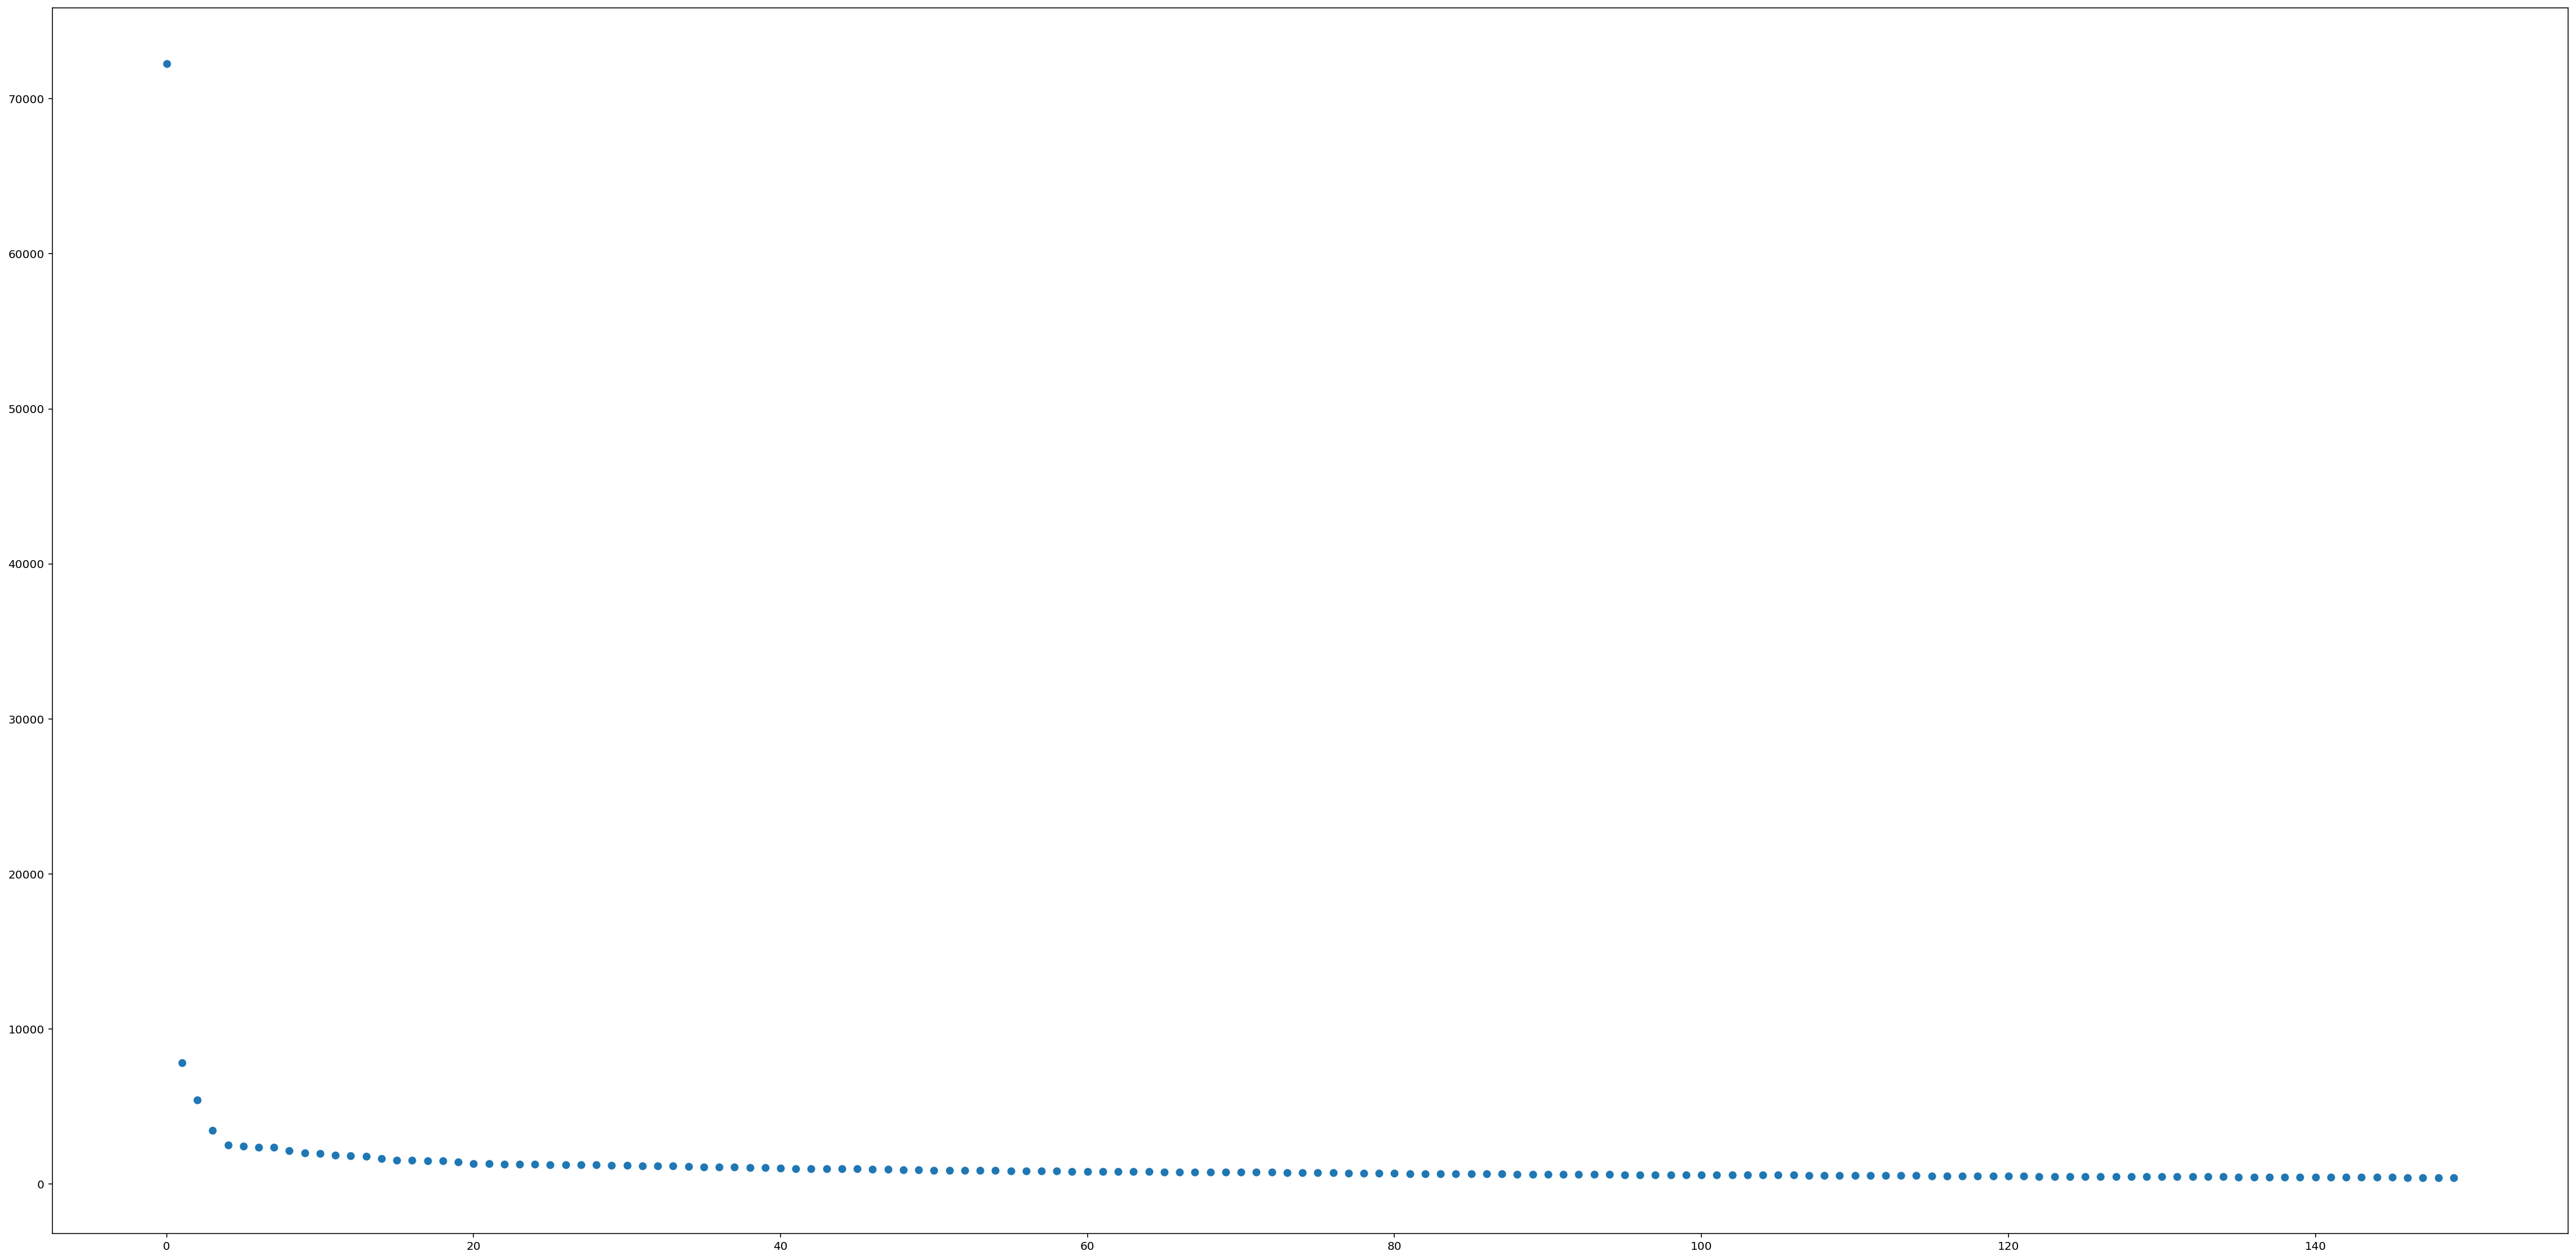

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(list(range(len(label_dict))), label_dict.values())

for word,pos in list(label_dict.keys(), list(range(len(label_dict)))):
    ax.annotate(word,pos, fontsize=30)
plt.show()

In [45]:
print(f'train_label_set len - {len(train_label_set)}, test_label_set len - {len(test_label_set)}')

print(f'train_menu_set len - {len(train_menu_set)}, test_menu_set len - {len(test_menu_set)}')

print(f'train_type_set len - {len(train_type_set)}, test_type_set len - {len(test_type_set)}')

train_label_set len - 22802, test_label_set len - 7200
train_menu_set len - 79408, test_menu_set len - 17585
train_type_set len - 5199, test_type_set len - 3287


In [46]:
# 많이 관측 되는 상위 30개 
train_label_most_common = Counter(train_label).most_common(30)
test_label_most_common = Counter(test_label).most_common(30)
train_menu_most_common = Counter(train_menu).most_common(30)
test_menu_most_common = Counter(test_menu).most_common(30)
train_type_most_common = Counter(train_type).most_common(30)
test_type_most_common = Counter(test_type).most_common(30)

print(train_label_most_common)
print(test_label_most_common)
print(train_menu_most_common)
print(test_menu_most_common)
print(train_type_most_common)
print(test_type_most_common)

[('-', 72257), ('아메리카노', 7822), ('카페라떼', 5430), ('바닐라 라떼', 3454), ('레몬 에이드', 2504), ('초코 라떼', 2452), ('라떼', 2386), ('딸기 라떼', 2375), ('자몽 에이드', 2174), ('카푸치노', 1999), ('달걀 샐러드', 1960), ('샌드위치', 1868), ('말차 라떼', 1827), ('캐러멜 마키아토', 1805), ('오렌지 주스', 1657), ('콜라', 1558), ('치킨 샌드위치', 1523), ('녹차 라떼', 1522), ('사이다', 1502), ('카페모카', 1429), ('에스프레소', 1322), ('핫도그', 1314), ('갈릭 베이컨 치즈', 1297), ('베이컨 딥치즈번', 1295), ('생수', 1287), ('햄 치즈 프렌치토스트', 1268), ('치킨 샐러드', 1257), ('치즈 케이크', 1240), ('청포도 에이드', 1239), ('오렌지 에이드', 1222)]
[('-', 8539), ('아메리카노', 894), ('카페라떼', 692), ('바닐라 라떼', 418), ('딸기 라떼', 307), ('초코 라떼', 304), ('라떼', 298), ('레몬 에이드', 298), ('샌드위치', 247), ('달걀 샐러드', 241), ('자몽 에이드', 241), ('캐러멜 마키아토', 213), ('말차 라떼', 197), ('사이다', 195), ('녹차 라떼', 193), ('카푸치노', 193), ('오렌지 주스', 190), ('콜라', 188), ('카페모카', 175), ('치킨 샌드위치', 172), ('햄 치즈 프렌치토스트', 157), ('베이컨 딥치즈번', 153), ('에스프레소', 153), ('핫도그', 153), ('블루베리 요거트', 152), ('생수', 149), ('오렌지 에이드', 148), ('치킨 샐러드', 148), ('샐러드', 147), ('스프라이트', 14

In [47]:
ab_list_label = []
ab_list_menu = []
ab_list_type = []

for item in test_label_set:
  if item not in train_label_set:
    ab_list_label.append(item)
print(f'ab_list_label is {len(ab_list_label)}') 

for item in test_menu_set:
  if item not in train_menu_set:
    ab_list_menu.append(item)
print(f'ab_list_menu is {len(ab_list_menu)}')

for item in test_type_set:
  if item not in train_type_set:
    ab_list_type.append(item)
print(f'ab_list_type is {len(ab_list_type)}')

ab_list_label is 1263
ab_list_menu is 6238
ab_list_type is 33


In [60]:
ab_list_menu

['육개장(계절메뉴)',
 'ICED)블랙라떼',
 '콜드브루(Ice벤티)',
 '기원의꽃 세트',
 '미트 토마토 파스타',
 '쉬림프 로제 스파게티',
 '(룸)소고기 라구 파스타',
 '카카오와플세트',
 '시럽 2추가',
 '얼그레이 복숭아아이스티',
 '칫솔치약세트',
 '카페라떼(Only ice)',
 '바닐라허니마들렌',
 '스텔라 아르투아(S)',
 '티라미슈 라떼 (Ice)',
 '라임청 500ml',
 '핫갈비천왕 순살',
 '요거트스무디버블티',
 '라임ADE',
 '매콤순두부 토마토파스타',
 '만다리 선셋 드립백 10g',
 '감자당면 2번추가',
 '로제치킨 부리또',
 '선결제 1만원',
 '큰大한돈불고기(더블패티)',
 '페리에(탄산)',
 'ㅇㄹㅇㄹ',
 '본젤라또쿠앤크90ml(20.9월)(엘포인트)',
 '6000',
 '코하 소비뇽블랑',
 '망고 패션 후르츠 에이드 500ml',
 '600샤브샤브C',
 "(반값)'쿠앤크스무디",
 '오란씨파인',
 '화이트초코 마카다미아넛 쿠키',
 '참치대왕유부초밥',
 '(유통)뱃지_울릉도',
 '츄러스/아몬드/헤이즐넛/코코넛',
 '밀크초코 55%',
 '토마토모짜렐라 버거',
 'H)국화차',
 '광동진한헛개차PET',
 '낙우새철판볶음(2인)',
 '블랙사파이어 250g',
 '10pcs',
 '다우겐 스콘',
 '리얼플럼요거트볼 + 후르츠그래놀라',
 '단짠 프레첼 머랭쿠키',
 '라면_불닭주먹밥세트',
 '휘핑+딸기잼와플',
 '서울마님콘스프',
 '라즈베리 요거트 음료',
 '테스트물',
 '미니국',
 '찐또구마 고구마 6 (20g)',
 '청포도프룻치노',
 '코코넛블랙 젤라또',
 '새우마라탕',
 '탄산수350ml(레몬)',
 '제주 한라봉 컵빙수',
 '아채어묵바(2개)',
 '(ICE)토마토주스',
 '토피넛라떼xl',
 '마라탕       ',
 '라즈베리 구겔호프',
 '(1인세트)비어 하와이 세트',
 '망고스파클링',
 '아기붕어빵(반반)20개',
 '작은컵

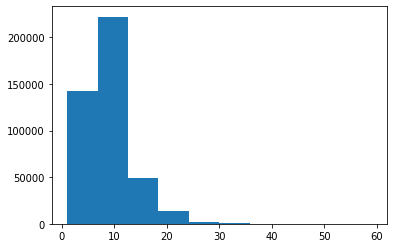

In [79]:
plt.hist(traindf['상품명'].apply(len),bins=10)
plt.show()

In [85]:
print(traindf['상품명'].apply(len).mean())
print(max(traindf['상품명'].apply(len)))
print(min(traindf['상품명'].apply(len)))

8.744175739069378
59
1


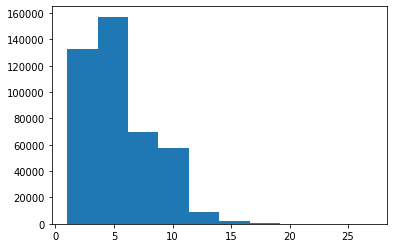

In [80]:
plt.hist(traindf['표준상품명'].apply(len),bins=10)
plt.show()

In [84]:
print(traindf['표준상품명'].apply(len).mean())
print(max(traindf['표준상품명'].apply(len)))
print(min(traindf['표준상품명'].apply(len)))

5.3001789209225505
27
1


In [104]:
traindf[traindf['표준상품명'].str.contains('알수없음')].tail(50)

,store_name,food_type,상품명,표준상품명,price
263005,비타민,옵션,ICE,알수없음,0
263006,비타민,NaN,ICE,알수없음,0
263007,피읖,NaN,ICE,알수없음,0
263008,보다버거,NaN,평일런치 안내,알수없음,0
263009,섬인섬연홍도협동조합( v2c),NaN,ICE,알수없음,300
263010,와플앤타코야끼(동패동),옵션,ICE,알수없음,0
263011,와플대학(옥천캠퍼스점),옵션메뉴,Ice,알수없음,0
263012,와플대학(고양동캠퍼스),옵션메뉴,Ice,알수없음,0
263013,와플대학(대전목동캠퍼스),옵션메뉴,Ice,알수없음,0
263014,와플대학(경주용황캠퍼스),옵션메뉴,Ice,알수없음,0


In [72]:
traindf[traindf['상품명'].str.contains('오미자효소')]

,store_name,food_type,상품명,표준상품명,price


In [76]:
testdf[testdf['표준상품명'].str.contains('오미자 효소')]

,store_name,food_type,상품명,표준상품명,price
33841,성은학교,NaN,오미자효소,오미자 효소,10000


In [73]:
testdf[testdf['상품명'].str.contains('오미자효소')]

,store_name,food_type,상품명,표준상품명,price
33841,성은학교,NaN,오미자효소,오미자 효소,10000


In [48]:
ab_list_label

['감귤 당근 주스',
 '땡초 파닭',
 '무화과 크림치즈 마카롱',
 '토마토 모짜렐라 버거',
 '복숭아 실론아이스티',
 '체리마루',
 '노아주스 바나나 리치 망고',
 '팥 슈크림',
 '망고 자스민 밀크티',
 '목살 스테이크 데미카레',
 '크림 콘 코코넛',
 '패션후르츠 망고티',
 '누텔라스틱',
 '단호박 매쉬 샐러드',
 '오리 한상',
 '카사바칩',
 '배나무 연잎 오리로스',
 '낙지 연포탕',
 '율무차 도넛',
 '치즈 웨지감자',
 '애플 히비스커스티',
 '제로 복숭아',
 '바나나 바닐라 프라페',
 '진빔 하이볼',
 '만두 짜조',
 '순살 양념반 치즈반',
 '간장반양념반',
 '우유 미숫가루 빙수',
 '초코칩 초코 머핀',
 '대창',
 '가지부침',
 '소고기 가지볶음',
 '오프너',
 '산펠그리노 오렌지 탄산수',
 '스타벅스 에스프레소 크림',
 '묵은지 돼지갈비찜',
 '(생)유자차',
 '양념 치킨윙',
 '자두 케이크',
 '새우 아보카도 샐러드',
 '럭셔리웨이퍼 롤 바닐라',
 '땅콩 버터 프레첼',
 '그라브락스 살몬 베이글',
 '주꾸미 야채볶음',
 '만두 해물 전골',
 '게맛살 볶음밥',
 '스테이크 라이스',
 '소고기 커리',
 '라면스프',
 '스타벅스 더블샷',
 '항정살 스테이크 오일 파스타',
 '쮸쮸바',
 '소고기 팟타이',
 '돼지 초코 크루아상와플',
 '제육 라이스',
 '(생)레몬 스파클링',
 '스팸 달걀 야채 볶음밥',
 '데르뜨 젤리 파인애플',
 '소금 크림 커피',
 '초코 가나쉬 케이크',
 '차돌 숙주 볶음면',
 '레드벨벳 크림',
 '쟁반 비빔국수',
 '페퍼로니 치즈 버거',
 '트러플 누룽지탕',
 '소금 버터 롤',
 '오트 드링크',
 '가리비 비빔밥',
 '바닐라 캐러멜시럽',
 '비프 고르곤졸라 스파게티',
 '햄 버거 덮밥',
 '감자 달걀 샌드위치',
 '한방 차',
 '자몽 프라프치노',
 '크루아상 햄 샌드위치',
 '크림치즈 정식',

In [ ]:
# 테스트 셋에서 대분류? 할만한 메뉴들을 모아서 
# 트레인 셋에서 임의 라벨링 진행 => 전처리하면서 성능도 높임 ( but 설명은 train set을 보면서 전처리 할 만한 것들을 모아서 임의로 진행)
# ex ) 대창을 살펴보니 ~대창 / 대창~ /~대창~ 으로 나뉨
# 그 중에 진짜 대창이라고 할 만한 것은 대창이 마지막에 올때 => endswith

In [ ]:
np.where(ab_list_label[0] in testdf[df_columns[3]])

(array([], dtype=int64),)

In [ ]:
train_label_dict = dict(Counter(train_label))
test_label_dict = dict(Counter(test_label))

a ='대창'

chang_list = []
for item in train_label_dict.keys():
  if a in item:
    print(item)
    chang_list.append(item)

대창 덮밥
대창 차돌 떡볶이
대창 치즈 떡볶이
대창 치즈 불백
몬스터쉐프 소대창
몬스터쉐프 양대창
소대창
소대창 덮밥
특양 대창 덮밥
한우 대창 떡볶이
한우 대창 순살 곱창 닭볶음탕
한우 대창 전골


In [ ]:
for item in chang_list:
  print(f'{item} is {train_label_dict[item]}')

대창 덮밥 is 5
대창 차돌 떡볶이 is 1
대창 치즈 떡볶이 is 3
대창 치즈 불백 is 3
몬스터쉐프 소대창 is 1
몬스터쉐프 양대창 is 1
소대창 is 1
소대창 덮밥 is 1
특양 대창 덮밥 is 7
한우 대창 떡볶이 is 3
한우 대창 순살 곱창 닭볶음탕 is 1
한우 대창 전골 is 1


In [ ]:
traindf['MENU_STD'] = [1 if chang_list in item else 0 for i, item in traindf['MENU_STD'].iteritems()]


In [91]:
traindf[traindf['표준상품명'].str.contains('사장')]

,store_name,food_type,상품명,표준상품명,price
220886,가원더카페,커피,사장님라떼(ICE),사장님 라떼,4500


In [28]:
traindf[traindf['표준상품명'].str.contains('없음')]

,store_name,food_type,상품명,표준상품명,price
262253,더196카페,커피,(매장)드시고 갑니다,알수없음,0
262254,치킨시대 명지대,포장,(포장)반반으로,알수없음,0
262255,미남당&배배꼬,쿠키슈,[마감할인]2개,알수없음,8000
262256,미남당&배배꼬,크림도넛,[마감할인]4개,알수없음,10000
262257,미남당&배배꼬,쿠키슈,[마감할인]4개,알수없음,15000
...,...,...,...,...,...
263050,영앤유,옵션,ICE,알수없음,0
263051,청년다방(해남),옵션,ICE,알수없음,0
263052,청년다방(완도),옵션,ICE,알수없음,0
263053,청년다방(완도),옵션,ice,알수없음,0


In [29]:
traindf[traindf['표준상품명'].str.contains('-')]

,store_name,food_type,상품명,표준상품명,price
0,BGT단팥빵_불광점,전체메뉴,-3000,-,-3000
1,BGT단팥빵_불광점,전체메뉴,-2000,-,-2000
2,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
3,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
4,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
...,...,...,...,...,...
310254,구구족_이대점,반반세트,족발보쌈 대\n(구구족 1족+보쌈 소),-,36900
310255,구구족_대치점,반반세트,족발보쌈 대\n(구구족 1족+보쌈 소),-,36900
310256,일만족발,내맘대로 반반 세트,족발(2인)+불족(2인),-,34800
310257,일만족발,내맘대로 반반 세트,족발(2인)+불족(300g),-,28800


In [30]:
traindf[traindf['표준상품명'].str.contains('떡볶이')]

,store_name,food_type,상품명,표준상품명,price
76680,스타버거,통합메뉴,옛날 가래떡볶이,가래 떡볶이,11900
76687,뉴욕쟁이디저트 목포남악점,목포남악점,가래떡 떡볶이,가래떡 떡볶이,4500
77363,교남김밥,떡볶이요리,간장버섯떡볶이,간장 버섯 떡볶이,9500
82273,배떡 동인천점,상품,미미 강정 떡볶이,강정 떡볶이,4200
82462,소소떡볶이_신당본점,[Limited] 신메뉴 개발 페스티벌,[신메뉴 페스티벌] 오독토독 게내장파스타떡볶이,게내장 파스타 떡볶이,9900
...,...,...,...,...,...
424661,떡볶이참잘하는집 부산명지점,NaN,후추 팍! 떡볶이,후추 떡볶이,8500
424662,떡볶이참잘하는집 부산명지점,NaN,후추팍떡볶이,후추 떡볶이,9500
424663,떡볶이참잘하는집 부산명지점,NaN,후추팍떡볶이,후추 떡볶이,0
424664,떡볶이참잘하는집 부산명지점,NaN,후추팍떡볶이,후추 떡볶이,9500


In [38]:
traindf[traindf['표준상품명'].str.contains('닭볶음')].tail()

,store_name,food_type,상품명,표준상품명,price
238763,한우리반찬,메인요리,순살닭볶음탕,순살 닭볶음탕,7000
239560,윤형빈의하이키친(파주금촌점),상품,후닭후닭 순살 닭볶음탕,순살닭볶음탕,12900
265545,김천재의유념떡볶이,옵션,양념순살닭볶음,양념 순살 닭볶음,0
407607,보글지글_포천운천점,3인분/2인분 메뉴,한우곱도리탕,한우 곱창 닭볶음탕,15900
407612,보글지글_익산신동점,냉동제품,한우대창순살곱도리탕,한우 대창 순살 곱창 닭볶음탕,15800


In [ ]:
a = []
for i in range(len(chang_list)):
  chang= traindf[traindf['MENU_STD']==chang_list[i]]['MENU_NM']
  a.append(chang)

print(a)

[119223     대창 덮밥
119224      대창덮밥
119225      대창덮밥
119226    매운대창덮밥
119227    매운대창덮밥
Name: MENU_NM, dtype: object, 119228    (NEW)차새대떡볶이(대창차돌떡볶이)
Name: MENU_NM, dtype: object, 119229    대창치즈떡볶이 2인
119230    대창치즈떡볶이 3인
119231    대창치즈떡볶이 4인
Name: MENU_NM, dtype: object, 119232    대창치즈불백 2인
119233    대창치즈불백 3인
119234    대창치즈불백 4인
Name: MENU_NM, dtype: object, 176105    몬스터쉐프 소대창
Name: MENU_NM, dtype: object, 176107    몬스터쉐프 양대창
Name: MENU_NM, dtype: object, 232963    소대창2
Name: MENU_NM, dtype: object, 232964    소대창 덮밥
Name: MENU_NM, dtype: object, 393528    매운 특양대창 덮밥
393529    매운 특양대창 덮밥
393530     매운특양대창 덮밥
393531      매운특양대창덮밥
393532       특양대창 덮밥
393533       특양대창 덮밥
393534       특양대창 덮밥
Name: MENU_NM, dtype: object, 407609    한우대창 떡볶이(2인)
407610    한우대창 떡볶이(3인)
407611    한우대창 떡볶이(4인)
Name: MENU_NM, dtype: object, 407612    한우대창순살곱도리탕
Name: MENU_NM, dtype: object, 407613    한우대창전골 1인분
Name: MENU_NM, dtype: object]


In [ ]:
_= traindf[traindf['MENU_STD']=='-']['MENU_NM']
_

_all = traindf[traindf['MENU_STD']=='-']

In [ ]:
_all

,store_name,food_type,MENU_NM,MENU_STD,price
0,BGT단팥빵_불광점,전체메뉴,-3000,-,-3000
1,BGT단팥빵_불광점,전체메뉴,-2000,-,-2000
2,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
3,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
4,미각상점 강남역지하상가점,마카롱/뚱카롱,0,-,0
...,...,...,...,...,...
310254,구구족_이대점,반반세트,족발보쌈 대\n(구구족 1족+보쌈 소),-,36900
310255,구구족_대치점,반반세트,족발보쌈 대\n(구구족 1족+보쌈 소),-,36900
310256,일만족발,내맘대로 반반 세트,족발(2인)+불족(2인),-,34800
310257,일만족발,내맘대로 반반 세트,족발(2인)+불족(300g),-,28800


'-3000'

In [ ]:
# 토큰화 기준 (), [] 삭제앞뒤 띄워주기
ame_item_list = []
for item in _:
  if '(' in item or ')' in item or '[' in item or ']' in item or '  ' in item or '   ' in item:
    item = item.replace('(',' ').replace(')',' ').replace('[',' ').replace(']',' ').replace('  ', ' ').replace('   ',' ')
    ame_item_list.append(item)
  else:
    ame_item_list.append(item)

In [ ]:
dict(Counter(ame_item_list).most_common())

{'샷추가': 620,
 ' 에그드랍 햄 앤 치즈 길거리 토스트 세트': 538,
 '클럽샌드위치 세트': 531,
 '갈릭 베이컨 치즈 세트': 515,
 '테스트': 409,
 '포장추가금액': 395,
 '베이컨 더블 치즈 + 수제라떼 S ': 370,
 '아보 베이컨 길거리 토스트 세트': 363,
 '아보홀릭 세트': 363,
 '아보홀릭 세트 배달용 ': 363,
 '베이컨 딥 치즈 번 세트 배달용 ': 362,
 '햄 앤 치즈 프렌치 토스트 세트': 362,
 '베이컨 더블 치즈 세트 배달용 ': 359,
 '베이컨 딥 치즈 번 세트': 359,
 ' 에그드랍 클럽샌드위치 세트 자체 ': 357,
 '갈릭 베이컨 치즈 + 하얀 반숙란': 357,
 ' 에그드랍 반했드랍 세트 자체 ': 355,
 ' 에그드랍 아메리칸 브런치 세트 자체 ': 355,
 ' 에그드랍 리얼 에그 콥 샐러드 세트': 355,
 '치즈 불고기 길거리 토스트 세트': 355,
 '치킨클럽샌드위치 세트': 355,
 '클럽샌드위치 세트 배달용 ': 355,
 '베이컨 더블 치즈 세트': 354,
 '아보 베이컨 길거리 토스트 세트 배달용 ': 354,
 '햄 앤 치즈 프렌치 토스트 세트 배달용 ': 354,
 ' 에그드랍 갈릭 베이컨 치즈 세트 자체 ': 353,
 '미스터에그 세트': 353,
 '데리야끼 바베큐 세트': 352,
 '코코넛젤리 추가': 352,
 '갈릭 베이컨 치즈 세트 배달용 ': 351,
 '아메리칸 햄 치즈 세트': 351,
 '타피오카펄 추가': 351,
 '샌드위치 & 해쉬 & 반했드랍 & 샐러드 3인 세트 배달용 ': 350,
 ' 에그드랍 에그 콥 샐러드 세트 자체 ': 349,
 '데리야끼 바베큐 세트 배달용 ': 348,
 '햄 앤 치즈 길거리 토스트 세트 배달용 ': 348,
 '미스터에그 세트 배달용 ': 347,
 '샌드위치 & 해쉬 & 반했드랍 2인 세트 배달용 ': 345,
 '치즈 불고기 길거리 토스트 세트 배달용 ': 343,
 

In [ ]:
train_label_dict['창']

1

In [ ]:
pd.read('offer')

# 텍스트 데이터 전처리 

In [ ]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [ ]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'존경하는 대통령님께  코스피 주식종목 중국 원양자원은 현재 계속되는 장   대표이사의 기이한 행동에 의하여 감사의견 거절이 나와 상장 폐지를 앞두고 있습니다  주주들이 모여 장   대표를 규탄해야할 이때 거래소 금감원 신한회계법인 의 잘못이라고 주장하며 많은 소액주주들을 이끌고 있는 중국원양자원의 한국인 사외이사 김  과 관련자들의 조사를 원합니다  그들은 감사의견 거절 의견 나오기 직전 주주총회에서 장   대표와 소통이 잘되고 있고 회사는 감사준비를 잘했다  앞으로 실적이 좋아질것이다  라고 말하며  자본시장에 관련법률 위반  비리에 얼룩진걸로 보이는  현재 증선위 고발로 검찰조사중임  장   대표를 연임시키면서 본인들은 스톡옵션 이라는 거대한 이익을 취하였습니다 대규모적자상태에서 스톡옵션을 부여한다는 쉽게 납득할수 없는 일들을 관철시키는 과정에서 회사 실적이 좋아질거다 감사준비 잘했다 등 사외이사 지위를 이용하여 선취한 회사내부의 정보를 주주모임 대표라는 지위를 이용하여 악용한것으로 보여집니다  또한 반대의견을 보이는 주주들을 모두 주주모임 카페에서 강퇴시키는등 여론을 조작하여 시세교란 행위를 유도하였다고 생각됩니다  현재는 신한회계를 소송하는 명분으로 주주들에게 수억원의 돈을 모금후 사용처를 밝히지 않고 있으나  다른 대안이 없는 소액주주들은 아무말 못하고 끌려다니며  누군가가 시키는 단체행동들을 하고있습니다  부디  만 천의 주주들을 위하여 김   사외이사와 관련자들을 꼭 조사해주시기 바랍니다  본글은 조사를 요청하는 글이지 누군가를 비방하는 글이 아님을 밝힙니다  혹시 조사전 개인에게 피해가 갈까하여 이름은 가렸습니다 '

In [ ]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = finance['content'].apply(preprocessing)

CPU times: user 628 ms, sys: 23.8 ms, total: 652 ms
Wall time: 653 ms


# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['소액주주', '보호를', '위해', '조사요청', '드립니다', '.']

In [ ]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['존경하는', '대통령님께', '코스피', '주식종목', '중국', '원양자원은', '현재', '계속되는', '장', '대표이사의']

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

6
174


In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:]

CPU times: user 13.9 s, sys: 187 ms, total: 14.1 s
Wall time: 14.1 s


7         [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
11        [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
54        [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
68        [존경하는, 문제인, 대통령님께, 먼저, 어렵고, 힘든, 국정운영을, 이끄시느라, ...
100       [안녕하십니까, 최근, 뉴스에, 주목을, 못, 받는, 뉴스가, 있습니다, 아시아경제...
102       [대통령님, 취임, 이후, 어려운, 상황, 속에서도, 원만한, 국정, 운영을, 해,...
107       [대초반이며서울전세살고, 인가족이며, 근로소득자입니다, 이번에, 청약으로, 서울, ...
118       [실수요자가, 생애최초로, 주택을, 구입할, 때, 받을, 수, 있는, 디딤돌대출의,...
131       [점점, 살기힘들어지는, 세상인것같습니다, 물가는, 하루가, 멀다하고, 오르고있는데...
132       [안녕하세요, 저는, 힘, 없는, 개인을, 대상으로, 마땅히, 지급해야, 할, 보험...
134       [안녕하세요, 저는, 힘, 없는, 개인을, 대상으로, 마땅히, 지급해야, 할, 보험...
146       [안녕하세요, 국책은행인, 기업은행에서, 아래, 링크와, 같이, 근, 년간, 제가,...
169       [수많은, 임대인중, 한사람으로써, 금번, 부동산대책으로, 인한, 큰, 피해를, 보...
174       [금번, 김현아, 국토교통부장관께서, 발표한, 부동산, 대책, 관련입니다, 우선, ...
192       [문제인, 대통령님, 대통령님, 안녕하세요, 저는, 년, 월, 일생, 김도윤입니다,...
196       [또다시, 합병으로, 어머니를, 모시고, 차병원에, 입원을, 해야합니다, 보행중, ...
214       [주, SGI, 와, 폐사는, 피보험자를, 인천세관으로

In [ ]:
tokens[sample_index][:10]

['존경하는', '대통령님께', '코스피', '주식종목', '중국', '원양자원은', '현재', '계속되는', '장', '대표이사의']

In [ ]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [ ]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-08-20 14:03:02,587 : INFO : 'pattern' package not found; tag filters are not available for English
2018-08-20 14:03:02,594 : INFO : collecting all words and their counts
2018-08-20 14:03:02,596 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-20 14:03:03,256 : INFO : PROGRESS: at sentence #10000, processed 2204292 words, keeping 321082 word types
2018-08-20 14:03:03,301 : INFO : collected 336763 word types from a corpus of 2332513 raw words and 10447 sentences
2018-08-20 14:03:03,302 : INFO : Loading a fresh vocabulary
2018-08-20 14:03:04,967 : INFO : effective_min_count=1 retains 336763 unique words (100% of original 336763, drops 0)
2018-08-20 14:03:04,968 : INFO : effective_min_count=1 leaves 2332513 word corpus (100% of original 2332513, drops 0)
2018-08-20 14:03:06,022 : INFO : deleting the raw counts dictionary of 336763 items
2018-08-20 14:03:06,029 : INFO : sample=0.001 downsamples 7 most-common words
2018-08-20 14:03:06,031 : INFO : downs

In [ ]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2018-08-20 14:03:43,607 : INFO : saving Word2Vec object under 1minwords, separately None
2018-08-20 14:03:43,611 : INFO : storing np array 'vectors' to 1minwords.wv.vectors.npy
2018-08-20 14:03:43,899 : INFO : not storing attribute vectors_norm
2018-08-20 14:03:43,902 : INFO : storing np array 'syn1neg' to 1minwords.trainables.syn1neg.npy
2018-08-20 14:03:44,605 : INFO : not storing attribute cum_table
2018-08-20 14:03:45,627 : INFO : saved 1minwords


In [ ]:
# 단어 사전 수
len(model.wv.vocab)

336763

In [ ]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '등',
 '것입니다',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '위해',
 '있다']

# 불용어
* 가장 자주 등장하는 단어이지만 불용어에 가깝다.


['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '것입니다',
 '등',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '위해']

In [ ]:
# voacab을 직접찍어 보면 dict 구조로 되어 있는 것을 볼 수 있습니다.
# vocab

In [ ]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'그': <gensim.models.keyedvectors.Vocab at 0x7fba770b2470>,
 '그리고': <gensim.models.keyedvectors.Vocab at 0x7fba7702ea90>,
 '년': <gensim.models.keyedvectors.Vocab at 0x7fba770c2d30>,
 '대한': <gensim.models.keyedvectors.Vocab at 0x7fba770b23c8>,
 '더': <gensim.models.keyedvectors.Vocab at 0x7fba770cc400>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7fba7705b1d0>,
 '및': <gensim.models.keyedvectors.Vocab at 0x7fba770aed30>,
 '수': <gensim.models.keyedvectors.Vocab at 0x7fba770b79e8>,
 '없는': <gensim.models.keyedvectors.Vocab at 0x7fba770c5d30>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7fba770bf6a0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7fba770bf518>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x7fba770b7e48>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x7fba770ae320>,
 '저는': <gensim.models.keyedvectors.Vocab at 0x7fba775bdf60>,
 '제': <gensim.models.keyedvectors.Vocab at 0x7fba7705ecc0>,
 '하고': <gensim.models.keyedvectors.Vocab at 0x7fba770bba58>,
 '하는': <gensim.models.keyedvec

In [ ]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'원양자원은'

In [ ]:
model.wv['주식']

array([ 0.12882946, -1.9512359 ,  0.16682811, -1.231234  , -0.44598684,
       -1.0230653 , -0.5472109 , -1.9902945 ,  0.04631213,  0.30512264,
       -1.9239057 ,  2.2586992 ,  0.16648217, -1.7105072 ,  2.8717744 ,
       -2.2651029 , -0.41353753, -1.6244981 , -0.9376563 ,  2.4191034 ,
       -0.957055  , -0.44404456,  0.5170243 ,  2.092808  ,  1.5141859 ,
       -2.9753308 , -0.9106745 , -0.85026324, -1.1595082 , -1.260623  ,
       -1.3445469 , -1.1455337 ,  0.6228063 , -0.9148927 ,  0.51569915,
       -2.4579291 ,  2.3095949 ,  1.1422428 ,  0.1959326 ,  0.10081547,
       -1.2240928 , -0.15792257,  0.9809431 , -0.5210797 ,  0.00798856,
       -0.00466812,  1.3647604 ,  2.717943  , -1.6528225 ,  0.44882056,
        2.3487206 , -0.47191936,  0.18601523,  0.10479068,  1.8271724 ,
        0.8436628 ,  0.48166415, -0.0918861 , -1.2465346 ,  0.4585373 ,
        0.10575577,  0.6213702 ,  0.28799835, -0.8979253 ,  2.068447  ,
        0.7371711 ,  1.2635826 ,  1.3205627 , -0.8612215 ,  1.58

In [ ]:
model.wv.most_similar('주식')

2018-08-20 14:04:10,433 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.9067968130111694),
 ('외국인', 0.9048248529434204),
 ('투자', 0.9017971754074097),
 ('기관', 0.8995514512062073),
 ('부동산', 0.8871292471885681),
 ('거래소', 0.8854435682296753),
 ('투자을', 0.8832146525382996),
 ('동유럽', 0.8818255662918091),
 ('스포츠토토', 0.8756975531578064),
 ('개인', 0.8730127215385437)]

In [ ]:
model.wv.most_similar('부동산')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.911975622177124),
 ('주식', 0.8871292471885681),
 ('가상화폐', 0.8841753602027893),
 ('열풍에', 0.879755973815918),
 ('코스닥', 0.8777716159820557),
 ('대책으로는', 0.870140790939331),
 ('막아봅시다', 0.8562763929367065),
 ('폭등으로', 0.8454762697219849),
 ('돈번', 0.8393696546554565),
 ('대책으로', 0.8380016088485718)]

In [ ]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'부동산'

In [ ]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.9067968130111694),
 ('외국인', 0.9048248529434204),
 ('투자', 0.9017971754074097),
 ('기관', 0.8995514512062073),
 ('부동산', 0.8871292471885681),
 ('거래소', 0.8854435682296753),
 ('투자을', 0.8832146525382996),
 ('동유럽', 0.8818255662918091),
 ('스포츠토토', 0.8756975531578064),
 ('개인', 0.8730127215385437)]

In [ ]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('관련해서는', 0.9023855924606323),
 ('제도', 0.8880362510681152),
 ('순기능과', 0.8801544308662415),
 ('건의드립니다', 0.877223014831543),
 ('허용하는것은', 0.8728883266448975),
 ('폐지', 0.8719335794448853),
 ('규제', 0.8703362345695496),
 ('공매도를', 0.8697158694267273),
 ('교란시키는', 0.8687506914138794),
 ('네이키드', 0.8679797649383545)]

In [ ]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('공매도', 0.8749740123748779),
 ('가상암호화폐', 0.8667083978652954),
 ('희생량되는', 0.8607122898101807),
 ('기관', 0.850810170173645),
 ('투자을', 0.8491550087928772),
 ('인가제', 0.8457314372062683),
 ('법률개혁', 0.8371466994285583),
 ('투기자들', 0.8354102969169617),
 ('개인', 0.8353456258773804),
 ('동유럽', 0.8333125114440918)]

# 단어 유사도

In [ ]:
model.wv.similarity('주식', '부동산')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8871291

In [ ]:
model.wv.similarity('주식', '투자')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9017971

In [ ]:
model.wv.similarity('주식', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.848803

In [ ]:
model.wv.similarity('주식', '현금')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.700337

In [ ]:
model.wv.similarity('삼성', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.91529036

In [ ]:
model.wv.similarity('주식', '공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.85386556

# 단어 유사도 시각화

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-08-20 14:04:52,431 : INFO : loading Doc2Vec object from 1minwords
2018-08-20 14:04:53,995 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-08-20 14:04:53,996 : INFO : loading vectors from 1minwords.wv.vectors.npy with mmap=None
2018-08-20 14:04:54,053 : INFO : setting ignored attribute vectors_norm to None
2018-08-20 14:04:54,054 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2018-08-20 14:04:54,055 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2018-08-20 14:04:54,056 : INFO : loading syn1neg from 1minwords.trainables.syn1neg.npy with mmap=None
2018-08-20 14:04:54,310 : INFO : setting ignored attribute cum_table to None
2018-08-20 14:04:54,311 : INFO : loaded 1minwords


In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Feature의 길이 336763
[-0.15100549  0.04007627  0.16633248 -0.01255542 -0.09312082  0.05666459
 -0.40367058 -0.0890436   0.26588    -0.01986223]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [ ]:
df.head(20)

,x,y
존경하옵는,8.371716,0.646034
문재인대통령님께,8.073747,1.368552
저는,-2.260032,7.010303
중국원양자원이라는,12.971478,2.120747
KOSPI,8.293594,3.824521
상장사의,10.456066,2.552522
소액,0.350966,3.667275
주주입니다,9.169335,3.131824
중국원양자원,7.905150,3.747583
이하,-1.919995,0.600954


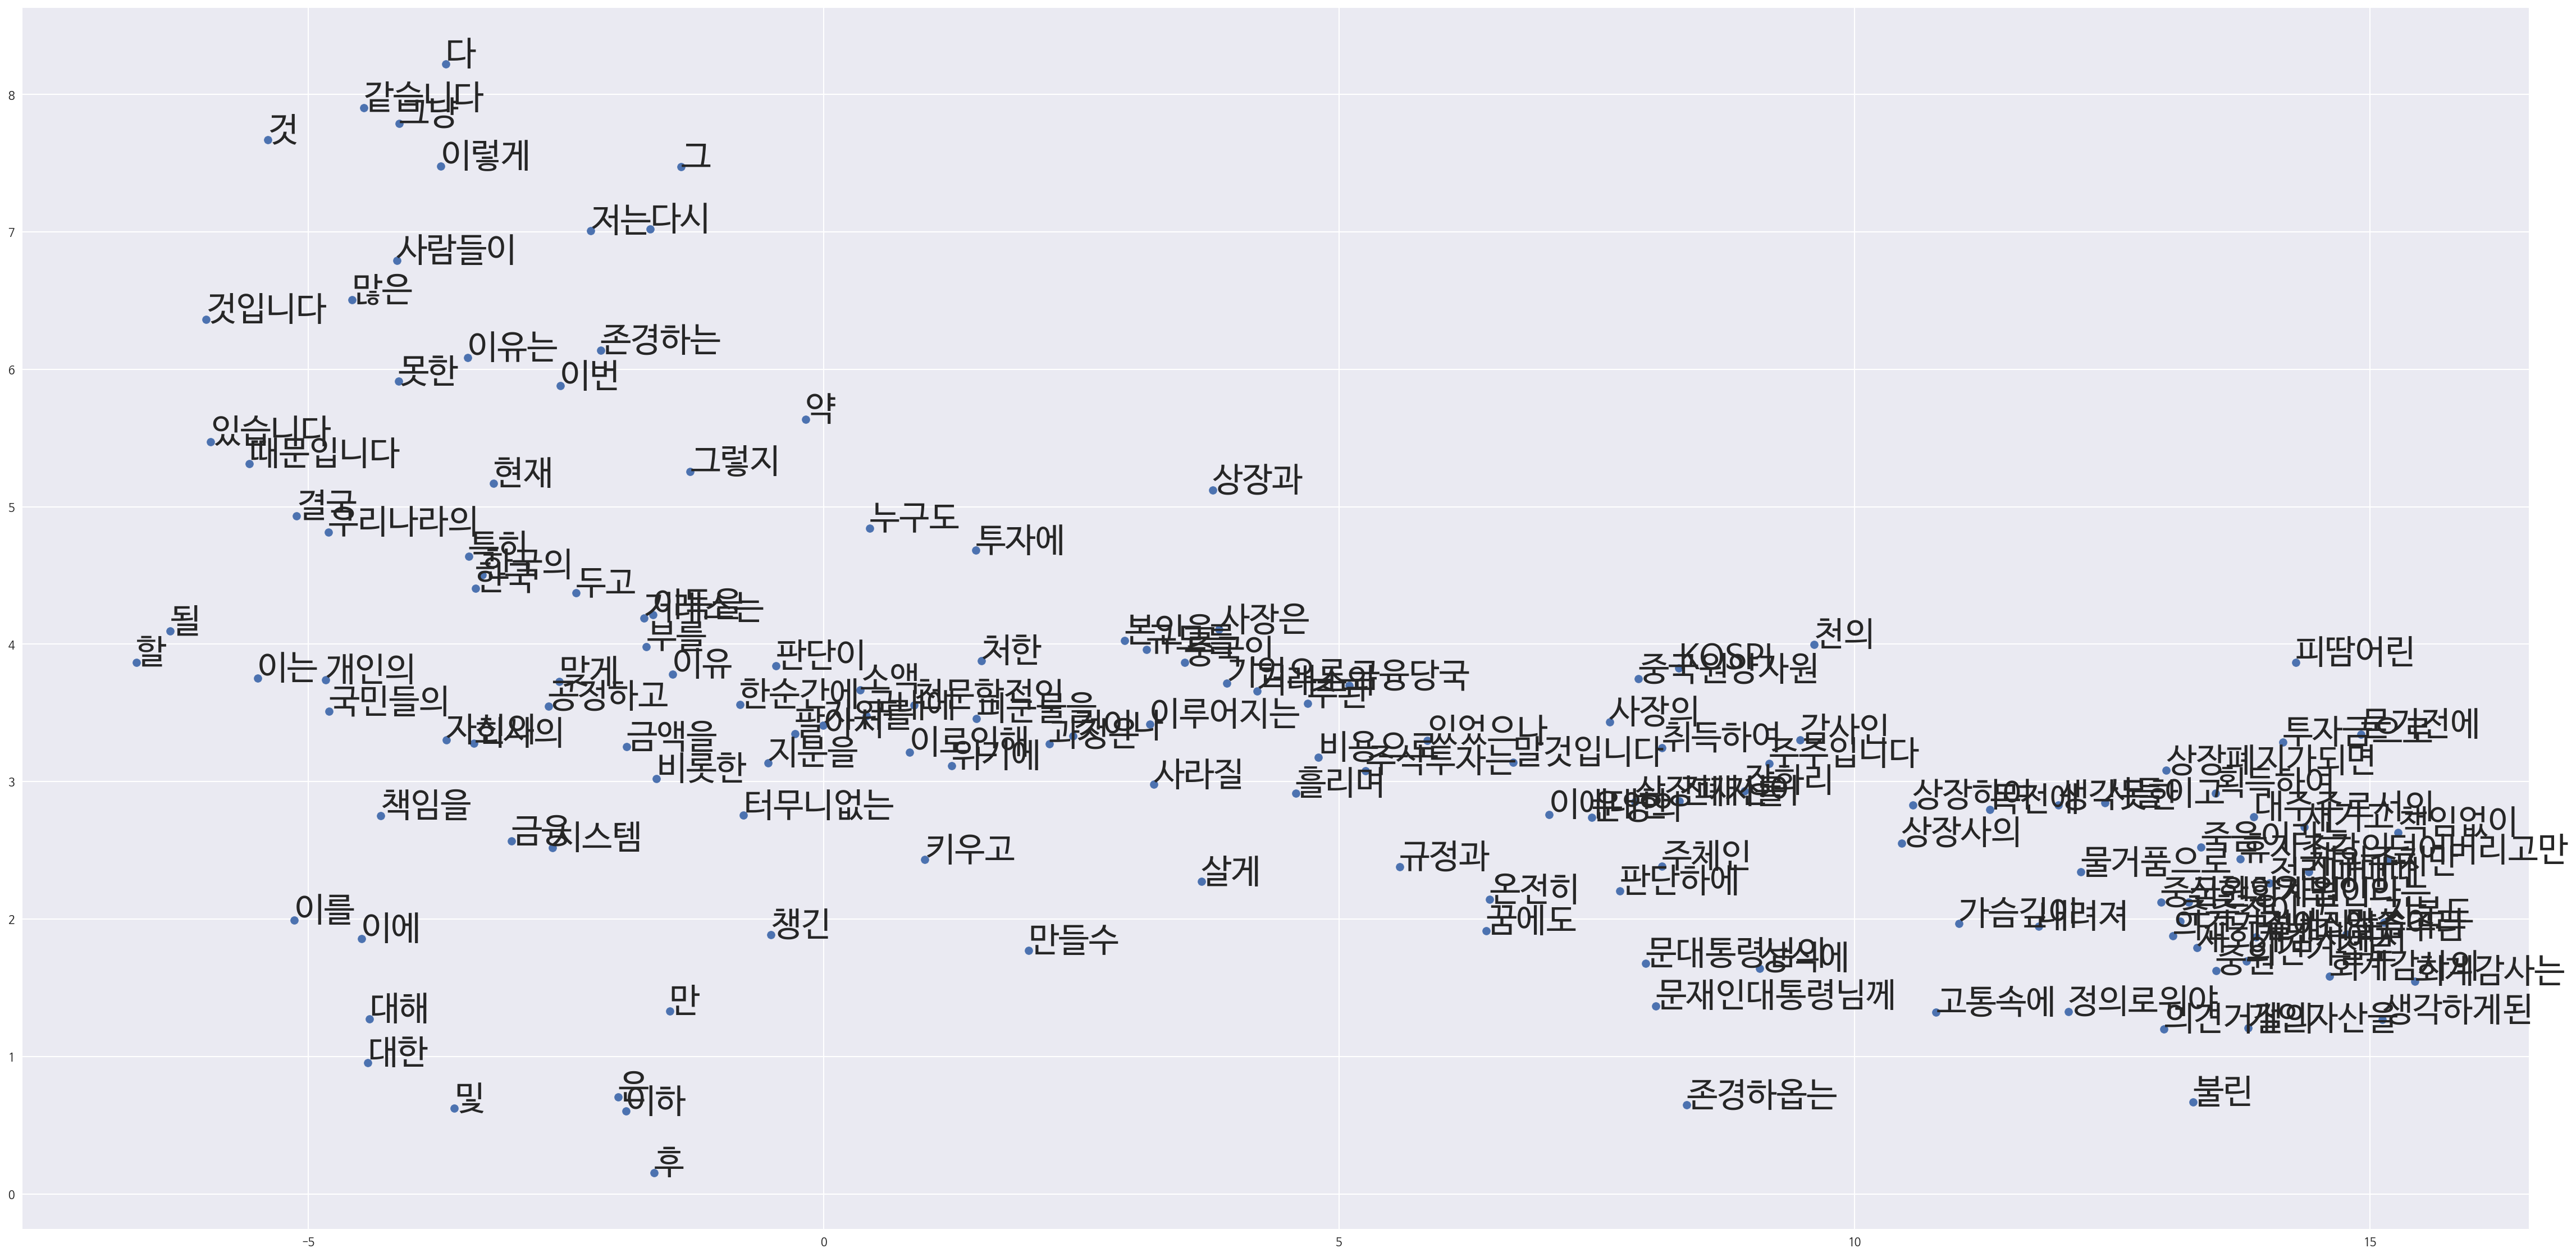

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()